<a href="https://colab.research.google.com/github/ficle-fr/pix2pix_change_style/blob/colabs/colabs/train_tpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ficle-fr/pix2pix_change_style.git

In [ ]:
!sudo apt install libcairo2-dev pkg-config python3-dev
!pip install pycairo

In [10]:
import tensorflow as tf
import sys
sys.path.append('/content/pix2pix_change_style')
from train import fit

from generator import Generator, generator_loss
from descriminator import Discriminator, discriminator_loss

from img_generator import img_pair_gen1


In [14]:
print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', '/content/pix2pix_change_style', '/content/pix2pix_change_style']


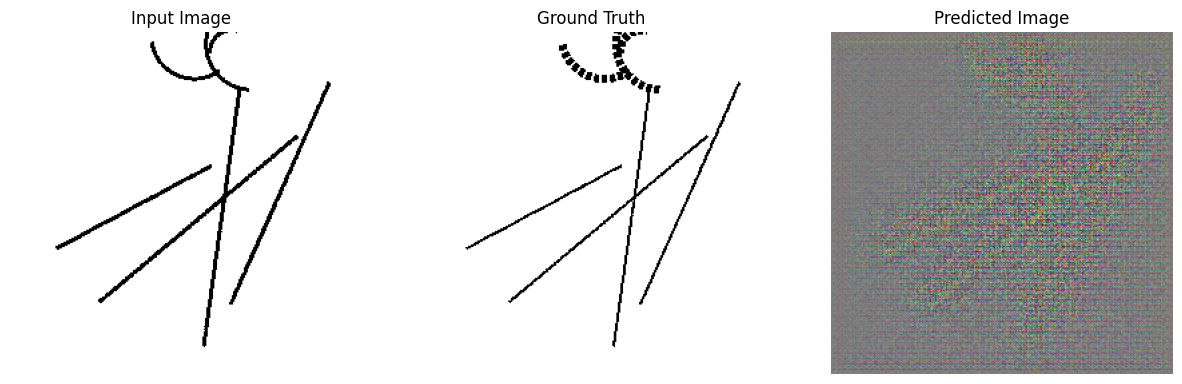

100%|██████████| 10/10 [06:21<00:00, 38.20s/it]



Time taken for 1 epoch: 381.97 sec



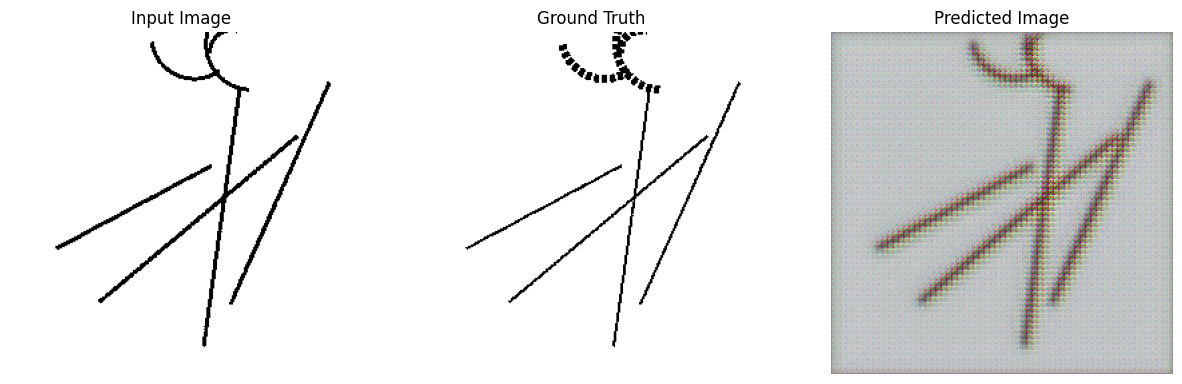

100%|██████████| 10/10 [05:23<00:00, 32.37s/it]



Time taken for 1 epoch: 323.76 sec



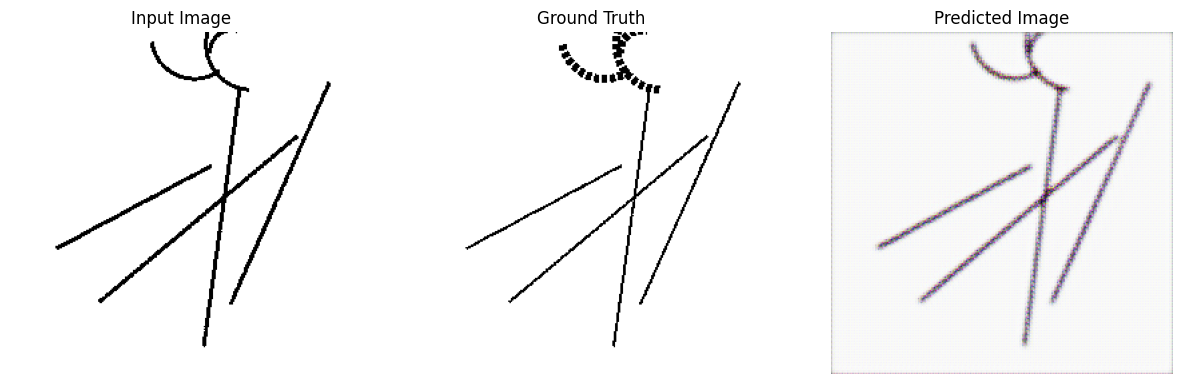

In [3]:
generator = Generator([256, 256, 3], 3)
discriminator = Discriminator([256, 256, 3])

generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
def checkpoint_callback():
  pass

BATCH_SIZE = 5
dataset = tf.data.Dataset.from_generator(
    lambda: img_pair_gen1(256, 256), output_signature = (
        tf.TensorSpec(shape = (256, 256, 3), dtype = tf.float32),
        tf.TensorSpec(shape = (256, 256, 3), dtype = tf.float32)))
dataset = dataset.batch(BATCH_SIZE)

#fit(generator, discriminator, generator_optimizer, discriminator_optimizer,
#    dataset, dataset, 40, 50, checkpoint_callback)
fit(generator, discriminator, generator_optimizer, discriminator_optimizer,
    dataset, dataset, 2, 10, checkpoint_callback)


In [ ]:
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')  # TPU detection
  print("Total number of TPU cores in the TPU system:",
        tpu.get_tpu_system_metadata().num_cores)
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)